In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [20]:
url = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"

# load the data from url into a DataFrame
df = pd.read_csv(url)

df

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer
...,...,...,...,...,...,...,...,...,...
995,996,fedF4c7Fd9e7cFa,Kurt,Bryant,Female,lyonsdaisy@example.net,021.775.2933,1959-01-05,Personnel officer
996,997,ECddaFEDdEc4FAB,Donna,Barry,Female,dariusbryan@example.com,001-149-710-7799x721,2001-10-06,Education administrator
997,998,2adde51d8B8979E,Cathy,Mckinney,Female,georgechan@example.org,+1-750-774-4128x33265,1918-05-13,Commercial/residential surveyor
998,999,Fb2FE369D1E171A,Jermaine,Phelps,Male,wanda04@example.net,(915)292-2254,1971-08-31,Ambulance person


In [21]:
# view the first row in the dataframe
df.iloc[0]


Index                              1
User Id              8717bbf45cCDbEe
First Name                    Shelia
Last Name                    Mahoney
Sex                             Male
Email            pwarner@example.org
Phone                   857.139.8239
Date of birth             2014-01-27
Job Title          Probation officer
Name: 0, dtype: object

In [22]:
# count each of the entries under 'Sex' column and assign to a variable
value_count = df["Sex"].value_counts()


<Axes: ylabel='count'>

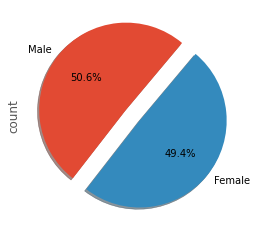

In [23]:
# plot a piechart, add percentage, explode the chart, and rotate
value_count.plot.pie(autopct="%.1f%%", explode=(0.1, 0.1), shadow=True, startangle=50)